<a href="https://colab.research.google.com/github/Athu06/ATHARVA-CHOUDHARI/blob/main/LSTM_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf

In [18]:
start = '2013-01-01'
end = '2023-12-31'
stock = 'AAPL'

In [19]:
data= yf.download(stock,start,end)

[*********************100%%**********************]  1 of 1 completed


In [20]:
data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2013-01-02,19.779285,19.821428,19.343929,19.608213,16.769098,560518000
2013-01-03,19.567142,19.631071,19.321428,19.360714,16.557430,352965200
2013-01-04,19.177500,19.236786,18.779642,18.821428,16.096228,594333600
2013-01-07,18.642857,18.903570,18.400000,18.710714,16.001545,484156400
2013-01-08,18.900356,18.996071,18.616072,18.761070,16.044605,458707200
...,...,...,...,...,...,...
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.600006,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,193.050003,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,193.149994,48087700


In [21]:
data.head

<bound method NDFrame.head of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-02   19.779285   19.821428   19.343929   19.608213   16.769098   
2013-01-03   19.567142   19.631071   19.321428   19.360714   16.557430   
2013-01-04   19.177500   19.236786   18.779642   18.821428   16.096228   
2013-01-07   18.642857   18.903570   18.400000   18.710714   16.001545   
2013-01-08   18.900356   18.996071   18.616072   18.761070   16.044605   
...                ...         ...         ...         ...         ...   
2023-12-22  195.179993  195.410004  192.970001  193.600006  193.600006   
2023-12-26  193.610001  193.889999  192.830002  193.050003  193.050003   
2023-12-27  192.490005  193.500000  191.089996  193.149994  193.149994   
2023-12-28  194.139999  194.660004  193.169998  193.580002  193.580002   
2023-12-29  193.899994  194.399994  191.729996  192.529999  192.529999   

       

In [22]:
data.tail

<bound method NDFrame.tail of                   Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-02   19.779285   19.821428   19.343929   19.608213   16.769098   
2013-01-03   19.567142   19.631071   19.321428   19.360714   16.557430   
2013-01-04   19.177500   19.236786   18.779642   18.821428   16.096228   
2013-01-07   18.642857   18.903570   18.400000   18.710714   16.001545   
2013-01-08   18.900356   18.996071   18.616072   18.761070   16.044605   
...                ...         ...         ...         ...         ...   
2023-12-22  195.179993  195.410004  192.970001  193.600006  193.600006   
2023-12-26  193.610001  193.889999  192.830002  193.050003  193.050003   
2023-12-27  192.490005  193.500000  191.089996  193.149994  193.149994   
2023-12-28  194.139999  194.660004  193.169998  193.580002  193.580002   
2023-12-29  193.899994  194.399994  191.729996  192.529999  192.529999   

       

In [37]:
data= data.reset_index()

In [38]:
data = data.drop(['Date','Adj Close'], axis=1)

In [39]:
data

,Open,High,Low,Close,Volume
0,19.779285,19.821428,19.343929,19.608213,560518000
1,19.567142,19.631071,19.321428,19.360714,352965200
2,19.177500,19.236786,18.779642,18.821428,594333600
3,18.642857,18.903570,18.400000,18.710714,484156400
4,18.900356,18.996071,18.616072,18.761070,458707200
...,...,...,...,...,...
2763,195.179993,195.410004,192.970001,193.600006,37122800
2764,193.610001,193.889999,192.830002,193.050003,28919300
2765,192.490005,193.500000,191.089996,193.149994,48087700
2766,194.139999,194.660004,193.169998,193.580002,34049900


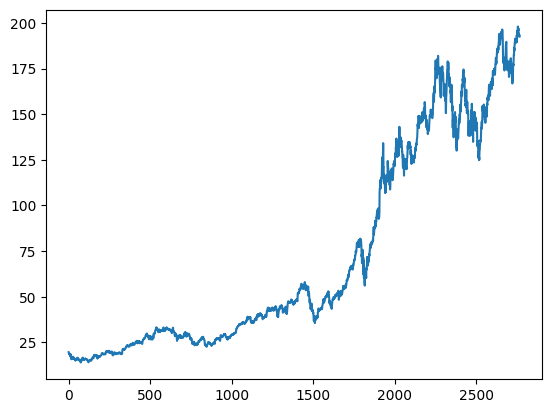

In [41]:
plt.plot(data.Close)

In [43]:
ma100 = data.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2763    181.768301
2764    181.787101
2765    181.898701
2766    182.046001
2767    182.173301
Name: Close, Length: 2768, dtype: float64

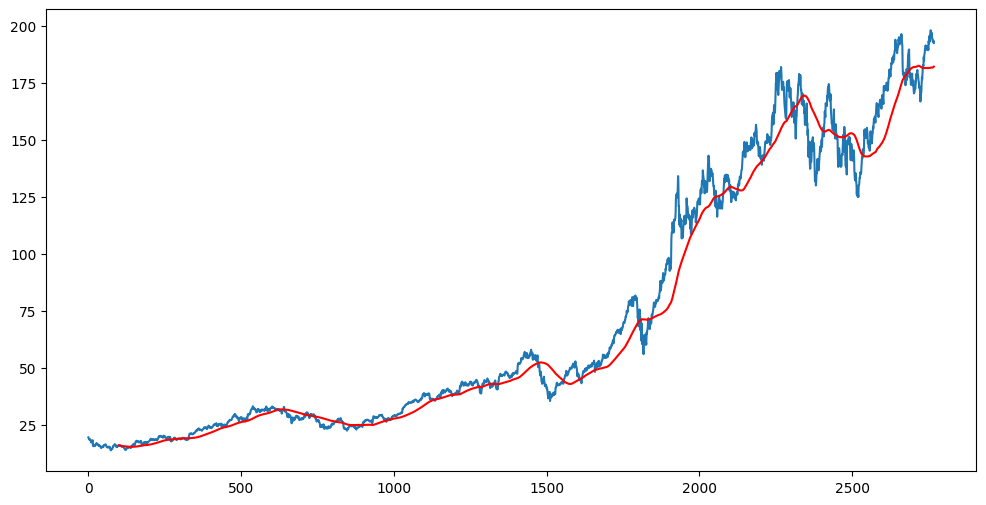

In [45]:
plt.figure(figsize=(12,6))
plt.plot(data.Close)
plt.plot(ma100,'r')

In [46]:
ma200 = data.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
2763    178.649100
2764    178.871851
2765    179.085250
2766    179.290201
2767    179.487900
Name: Close, Length: 2768, dtype: float64

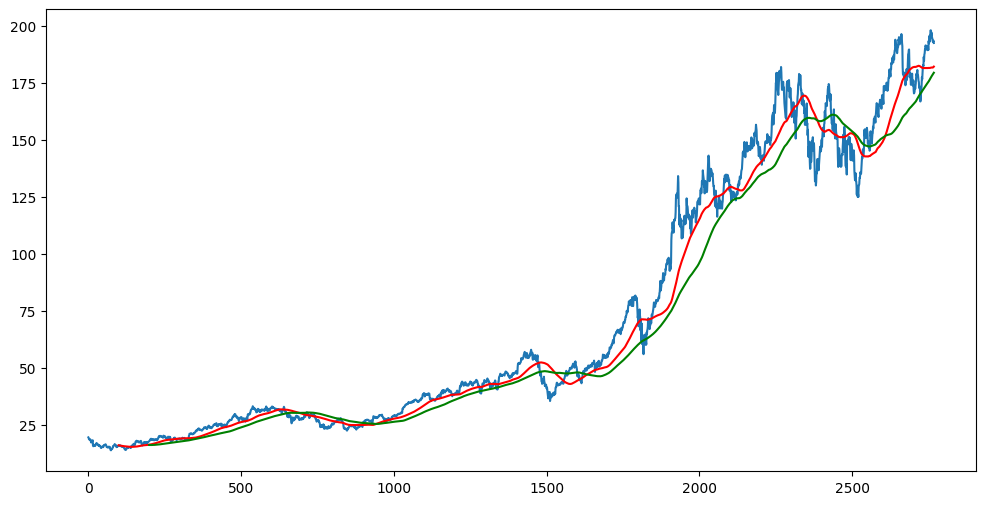

In [48]:
plt.figure(figsize=(12,6))
plt.plot(data.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [49]:
data.shape

(2768, 5)

In [51]:
# Spliting data into Training and Testing

data_training= pd.DataFrame(data['Close'][0:int(len(data)*0.70)])
data_testing= pd.DataFrame(data['Close'][int(len(data)*0.70): int(len(data))])


In [52]:
print(data_training.shape)
print(data_testing.shape)


(1937, 1)
(831, 1)


In [53]:
data_training

,Close
0,19.608213
1,19.360714
2,18.821428
3,18.710714
4,18.761070
...,...
1932,120.879997
1933,120.959999
1934,112.820000
1935,117.320000


In [54]:
data_testing

,Close
1937,112.000000
1938,115.360001
1939,115.540001
1940,112.129997
1941,110.339996
...,...
2763,193.600006
2764,193.050003
2765,193.149994
2766,193.580002


In [55]:
from sklearn.preprocessing import MinMaxScaler
scaler= MinMaxScaler(feature_range=(0,1))

In [56]:
data_training_array = scaler.fit_transform(data_training)

In [57]:
data_training_array

array([[0.04708139],
       [0.04502289],
       [0.04053753],
       ...,
       [0.82234426],
       [0.85977174],
       [0.82791678]])

In [60]:
data_training_array.shape

(1937, 1)

In [62]:
x_train=[]
y_train=[]

for i in range(100, data_training.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])

x_train,y_train = np.array(x_train), np.array(y_train)

In [63]:
# ML Model

In [64]:
from keras.layers import Dense, Dropout , LSTM
from keras.models import Sequential

In [74]:
model = Sequential()
model.add(LSTM(units=50, activation ='relu',return_sequences= True, input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model = Sequential()
model.add(LSTM(units=60, activation ='relu',return_sequences= True,))
model.add(Dropout(0.3))

model = Sequential()
model.add(LSTM(units=80, activation ='relu',return_sequences= True, ))
model.add(Dropout(0.4))

model = Sequential()
model.add(LSTM(units=120, activation ='relu' ))
model.add(Dropout(0.5))

model.add(Dense(units=1))

In [78]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_8 (LSTM)               (None, 120)               58560     
                                                                 
 dropout_7 (Dropout)         (None, 120)               0         
                                                                 
 dense_1 (Dense)             (None, 1)                 121       
                                                                 
Total params: 58681 (229.22 KB)
Trainable params: 58681 (229.22 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [80]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train, epochs=50)

Epoch 1/50
58/58 [==============================] - 10s 123ms/step - loss: 0.0218
Epoch 2/50
58/58 [==============================] - 5s 95ms/step - loss: 0.0030
Epoch 3/50
58/58 [==============================] - 7s 125ms/step - loss: 0.0031
Epoch 4/50
58/58 [==============================] - 5s 95ms/step - loss: 0.0026
Epoch 5/50
58/58 [==============================] - 7s 123ms/step - loss: 0.0022
Epoch 6/50
58/58 [==============================] - 5s 94ms/step - loss: 0.0021
Epoch 7/50
58/58 [==============================] - 7s 125ms/step - loss: 0.0023
Epoch 8/50
58/58 [==============================] - 6s 95ms/step - loss: 0.0021
Epoch 9/50
58/58 [==============================] - 6s 109ms/step - loss: 0.0018
Epoch 10/50
58/58 [==============================] - 6s 109ms/step - loss: 0.0016
Epoch 11/50
58/58 [==============================] - 5s 94ms/step - loss: 0.0013
Epoch 12/50
58/58 [==============================] - 7s 125ms/step - loss: 0.0015
Epoch 13/50
58/58 [==========

In [81]:
model.save('keras_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [82]:
data_testing.head()

,Close
1937,112.000000
1938,115.360001
1939,115.540001
1940,112.129997
1941,110.339996


In [83]:
past_100_days= data_training.tail(100)


In [84]:
final_data= past_100_days.append(data_testing, ignore_index=True)

<ipython-input-84-7023912a4bad>:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_data= past_100_days.append(data_testing, ignore_index=True)


In [85]:
final_data.head()

,Close
0,67.092499
1,69.025002
2,68.757500
3,70.742500
4,70.792503


In [86]:
input_data= scaler.fit_transform(final_data)
input_data

array([[0.        ],
       [0.01474996],
       [0.01270823],
       [0.02785889],
       [0.02824054],
       [0.01948211],
       [0.03694166],
       [0.04852404],
       [0.03949856],
       [0.04730286],
       [0.05569867],
       [0.06155668],
       [0.06749097],
       [0.07968403],
       [0.08899577],
       [0.08212645],
       [0.07495182],
       [0.07855823],
       [0.0750663 ],
       [0.08890033],
       [0.08542756],
       [0.09704813],
       [0.09250675],
       [0.09639937],
       [0.09227778],
       [0.09491097],
       [0.09517813],
       [0.09458661],
       [0.10204746],
       [0.10489057],
       [0.10828706],
       [0.10294429],
       [0.12046101],
       [0.12420096],
       [0.14429369],
       [0.16118076],
       [0.12885683],
       [0.13439043],
       [0.14238555],
       [0.15973055],
       [0.15879558],
       [0.15906275],
       [0.15522736],
       [0.17268685],
       [0.18730323],
       [0.17495755],
       [0.18407846],
       [0.162

In [88]:
input_data.shape

(931, 1)

In [90]:
x_test =[]
y_test =[]

for i in range(100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])


In [94]:
x_test , y_test =np.array(x_test) , np.array(y_test)
print(x_test.shape)
print(y_test.shape)

(831, 100, 1)
(831,)


In [92]:
# Making Predictions

y_predicted= model.predict(x_test)

26/26 [==============================] - 2s 60ms/step


In [93]:
y_predicted.shape

(831, 1)

In [95]:
y_predicted

array([[0.40446174],
       [0.38598126],
       [0.3734396 ],
       [0.36364862],
       [0.35245818],
       [0.34131202],
       [0.32792205],
       [0.32028958],
       [0.31667   ],
       [0.31009716],
       [0.30614817],
       [0.3076401 ],
       [0.31320918],
       [0.31890997],
       [0.32676035],
       [0.33565938],
       [0.34048283],
       [0.34806693],
       [0.35161358],
       [0.35610476],
       [0.35968485],
       [0.36451706],
       [0.37621233],
       [0.3841518 ],
       [0.39135718],
       [0.3970841 ],
       [0.3999649 ],
       [0.39837557],
       [0.3972209 ],
       [0.39463603],
       [0.3903141 ],
       [0.3849321 ],
       [0.3795971 ],
       [0.37629282],
       [0.36738104],
       [0.36351785],
       [0.3530507 ],
       [0.34299502],
       [0.33593842],
       [0.33494633],
       [0.33961314],
       [0.34524617],
       [0.34924874],
       [0.35310113],
       [0.3603818 ],
       [0.36722663],
       [0.3737039 ],
       [0.380

In [96]:
scaler.scale_

array([0.00763257])

In [97]:
scale_factor=1/0.00763257
y_predicted= y_predicted*scale_factor
y_test= y_test * scale_factor

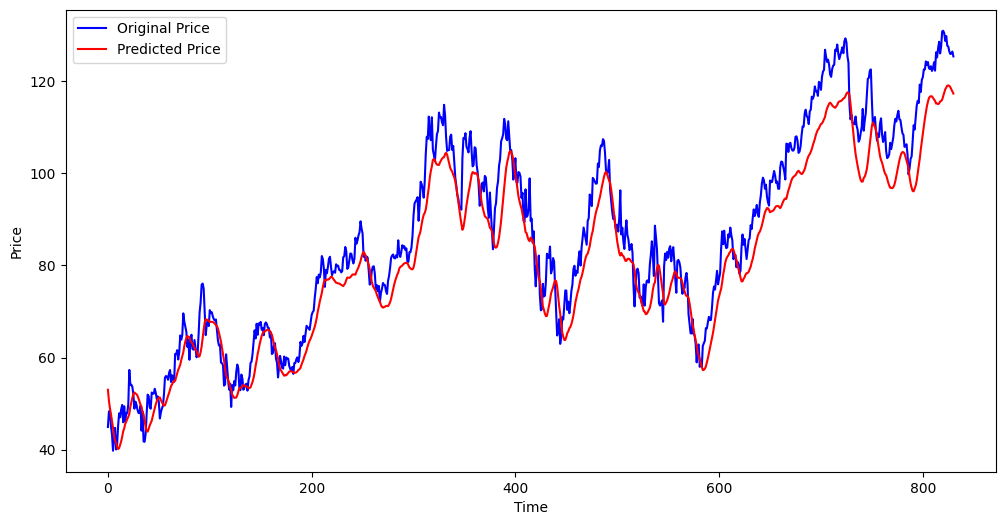

In [98]:
plt.figure(figsize=(12,6))
plt.plot(y_test, 'b' , label='Original Price')
plt.plot(y_predicted, 'r' , label='Predicted Price')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()